# ARIMA-SARIMA Forecast 

- Yahoo Stock

### Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load and prepare the dataset

In [2]:
data = pd.read_csv('yahoo_stock.csv')
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


In [6]:
stock_data = data['Close']
stock_data

Date
2015-11-23    2086.590088
2015-11-24    2089.139893
2015-11-25    2088.870117
2015-11-26    2088.870117
2015-11-27    2090.110107
                 ...     
2020-11-16    3626.909912
2020-11-17    3609.530029
2020-11-18    3567.790039
2020-11-19    3581.870117
2020-11-20    3557.540039
Name: Close, Length: 1825, dtype: float64

### Step 3: Split the data into training and testing sets

In [7]:
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

In [8]:
test

Date
2019-11-22    3110.290039
2019-11-23    3110.290039
2019-11-24    3110.290039
2019-11-25    3133.639893
2019-11-26    3140.520020
                 ...     
2020-11-16    3626.909912
2020-11-17    3609.530029
2020-11-18    3567.790039
2020-11-19    3581.870117
2020-11-20    3557.540039
Name: Close, Length: 365, dtype: float64

### Step 4: Train the ARIMA model

In [9]:
p, d, q = 1, 1, 1
model_arima = ARIMA(train, order=(p, d, q))
results_arima = model_arima.fit()

In [10]:
# p = 1: The model considers 1 lagged observation for the AR part (i.e., it uses the most recent observation to predict the next one).
# d = 1: The model applies first-order differencing to make the data stationary (removing trends by subtracting the previous value from 
# the current value).
# q = 1: The model uses 1 lagged error term for the MA part, meaning it uses the residual error from the previous time step to correct 
# future predictions.

### Step 5: Forecast using the ARIMA model

In [11]:
forecast_arima = results_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

In [12]:
forecast_arima

2019-11-22    3103.802830
2019-11-23    3103.794236
2019-11-24    3103.794517
2019-11-25    3103.794508
2019-11-26    3103.794508
                 ...     
2020-11-16    3103.794508
2020-11-17    3103.794508
2020-11-18    3103.794508
2020-11-19    3103.794508
2020-11-20    3103.794508
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

### Step 6: Train the SARIMA model

In [13]:
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12
model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results_sarima = model_sarima.fit()

### Step 7: Forecast using the SARIMA model

In [14]:
forecast_sarima = results_sarima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

In [15]:
forecast_sarima

2019-11-22    3104.020839
2019-11-23    3105.568436
2019-11-24    3107.091793
2019-11-25    3107.776242
2019-11-26    3110.420094
                 ...     
2020-11-16    3356.696019
2020-11-17    3357.887048
2020-11-18    3359.565799
2020-11-19    3360.321469
2020-11-20    3362.962783
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

In [16]:
test

Date
2019-11-22    3110.290039
2019-11-23    3110.290039
2019-11-24    3110.290039
2019-11-25    3133.639893
2019-11-26    3140.520020
                 ...     
2020-11-16    3626.909912
2020-11-17    3609.530029
2020-11-18    3567.790039
2020-11-19    3581.870117
2020-11-20    3557.540039
Name: Close, Length: 365, dtype: float64

### Step 8: Plot the ARIMA and SARIMA forecasts

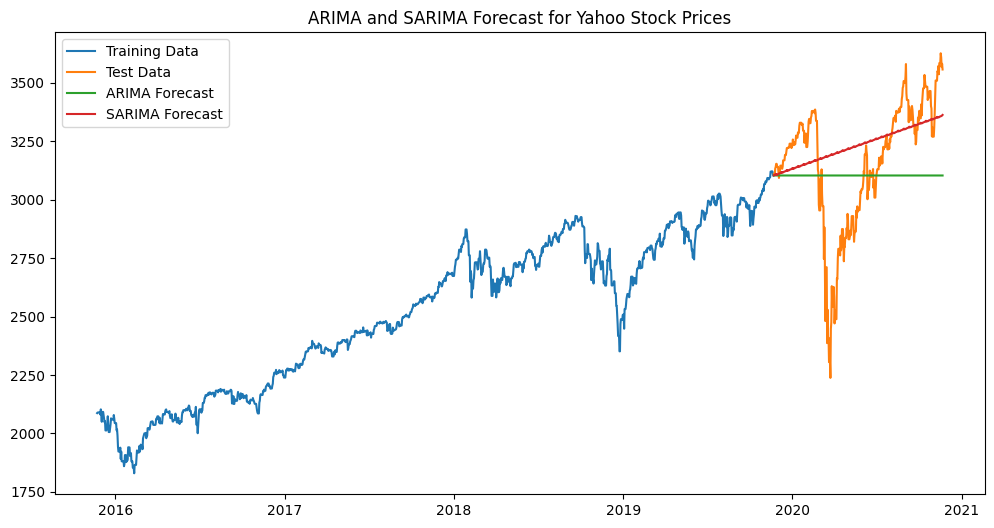

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('ARIMA and SARIMA Forecast for Yahoo Stock Prices')
plt.legend()
plt.show()